In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/DELL G15/Desktop/kaggle/videogames/games.csv")

In [3]:
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [4]:
df.shape

(1512, 14)

# Data cleaning and Preprocessing

dropping "unnamed" column

In [5]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


Checking for dtypes

In [7]:
df.dtypes

Title                 object
Release Date          object
Team                  object
Rating               float64
Times Listed          object
Number of Reviews     object
Genres                object
Summary               object
Reviews               object
Plays                 object
Playing               object
Backlogs              object
Wishlist              object
dtype: object

Checking for duplicate values
(Some games could have the same title even though they're not the same. That's why we combine title+name as the same team wouldn't name different games the same name)

In [8]:
df[df.duplicated(subset=['Title','Team'])]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
326,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
327,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
328,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
329,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
330,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Final Fantasy XIII-2,"Dec 15, 2011",['Square Enix'],3.3,482,482,"['Adventure', 'RPG']",FINAL FANTASY XIII-2 is created with the aim o...,"[""Oh boy. Playing the XIII series is looking m...",2.3K,58,1.4K,449
1270,Agar.io,"Apr 28, 2015","['Miniclip.com', 'Matheus Valadares']",2.2,81,81,"['Indie', 'Strategy']",Agar.io is a Massively-multiplayer top-down st...,"['""A Ganância que te move... É a mesma que te ...",4.4K,8,40,12
1271,Fatal Frame II: Crimson Butterfly,"Nov 27, 2003","['Tecmo Co., Ltd.', 'Ubisoft Entertainment']",4.2,398,398,['Adventure'],Crimson Butterfly is the second installment in...,['Pretty cool albeit a bit similar to the firs...,1K,38,690,513
1282,Super Mario Sunshine,"Sep 18, 2020","['Nintendo EAD', 'Nintendo']",3.7,19,19,"['Adventure', 'Platform']",A port of Super Mario Sunshine included in Sup...,['What an amazing remaster of an already amazi...,340,6,83,14


Dropping the duplicate rows

In [9]:
df.drop_duplicates(subset=['Title','Team'],inplace=True,ignore_index=True)

In [10]:
df.shape

(1114, 13)

Checking for null values

In [11]:
df.isna().sum()

Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

for our EDA, we will be most interested in the "Rating" column. That's why we will only deal with the rows with missing "Rating" values in this phase.

Let's start by viewing the concerned rows.

In [12]:
df.query('Rating.isnull()')

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
371,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
426,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
490,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
496,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
503,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
523,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
614,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
754,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
784,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291
826,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83,83,"['Adventure', 'Indie', 'RPG']","You are Névoa, an enigmatic child of Fate retu...",[],0,1,103,529


We will remove these rows

In [13]:
df.dropna(subset=['Rating'], inplace=True)

In [14]:
df.shape

(1101, 13)

with the date column, we first look for rows that don't follow the same format as most of the rows

In [15]:
#df[df['Release Date'].str.len()<12]
#df[df['Release Date'].str.len()==12]
#df[~(df['Release Date'].str.contains(','))]
df[(df['Release Date'].str.len()!=12) | ~(df['Release Date'].str.contains(','))]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
421,Deltarune,releases on TBD,['tobyfox'],4.3,313,313,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']","UNDERTALE's parallel story, DELTARUNE. Meet ne...","['Spamton is so hot, I want to kiss him in the...",1.3K,83,468,617
875,Elden Ring: Shadow of the Erdtree,releases on TBD,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18,18,"['Adventure', 'RPG']",An expansion to Elden Ring setting players on ...,['I really loved that they integrated Family G...,1,0,39,146


Different patterns were used to find irregular date patterns. And as a result, only 2 rows had a different date format in which the date was not mentioned.
Thus, we will drop these 2 rows since the games are not even released yet.

In [16]:
df=df.loc[~((df['Release Date'].str.len()!=12) | ~(df['Release Date'].str.contains(',')))]

Now, we will convert the Release date to datetime

In [17]:
df['Release Date']=pd.to_datetime(df['Release Date']).copy()

In [18]:
df['Release Date']

0      2022-02-25
1      2019-12-10
2      2017-03-03
3      2015-09-15
4      2017-02-24
          ...    
1109   2010-12-22
1110   2019-05-21
1111   2012-05-22
1112   2020-10-06
1113   2014-02-04
Name: Release Date, Length: 1099, dtype: datetime64[ns]

the columns: ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist'] are supposed to be integers.
But they're of type object because they contain the letter 'K' which replaces "000".   
We will deal with that in this line

In [19]:
for col in ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']:
    df[col]=df[col].replace({"K":"*1e3"}, regex=True).map(pd.eval).astype(int)

In [20]:
df.head(10)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300
5,Minecraft,2011-11-18,['Mojang Studios'],4.3,2300,2300,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33000,1800,1100,230
6,Omori,2020-12-25,"['OMOCAT', 'PLAYISM']",4.2,1600,1600,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A turn-based surreal horror RPG in which a chi...,"[""The best game I've played in my life"", ""omor...",7200,1100,4500,3800
7,Metroid Dread,2021-10-07,"['Nintendo', 'MercurySteam']",4.3,2100,2100,"['Adventure', 'Platform']",Join intergalactic bounty hunter Samus Aran in...,['Have only been a Metroid fan for couple of y...,9200,759,3400,3300
8,Among Us,2018-06-15,['InnerSloth'],3.0,867,867,"['Indie', 'Strategy']",Join your crew-mates in a multiplayer game of ...,"[""it's a solid party game. i'm bad at lying th...",25000,470,776,126
9,NieR: Automata,2017-02-23,"['PlatinumGames', 'Square Enix']",4.3,2900,2900,"['Brawler', 'RPG']","NieR: Automata tells the story of androids 2B,...","['Holy shit', 'im carrying the weight of the w...",18000,1100,6200,3600


# Exploratory Data analysis
For the EDA, we will make few changes:  
1. Create a new dataframe which we will call "df1"
2. explode the "Genre" column to be able to run an EDA on the separate genres using the groupby.  
Note: We will only using this new df when we're grouping by genres. Other than that, we will have repeating entries, thus an inaccurate analysis

Creating new df and adding new column "Year" to it as well as our original df

In [21]:
df1=df
df1['Year']=df['Release Date'].dt.year
df['Year']= df['Release Date'].dt.year

exploding the "Genres" column

In [22]:
df1['Sep_Genres']= df['Genres'].apply(lambda x: [g.strip() for g in x.strip('[]').split(',')])
df1= df1.explode('Sep_Genres')
df1['Sep_Genres']= df1['Sep_Genres'].str.strip("'")

In [ ]:
df1.head(15)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Year,Sep_Genres
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,2022,Adventure
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,2022,RPG
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600,2019,Adventure
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600,2019,Brawler
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600,2019,Indie
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600,2019,RPG
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600,2017,Adventure
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600,2017,RPG
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800,2015,Adventure
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800,2015,Indie


### Visualizations

2022 most 8 popular games (most players)

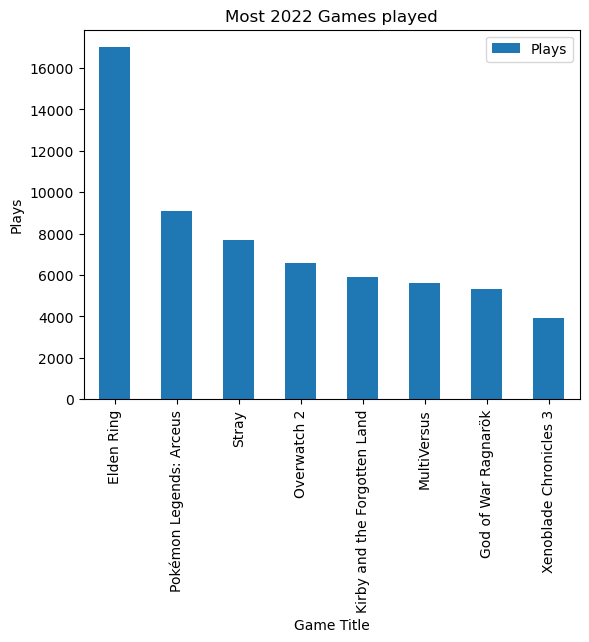

In [24]:
ax = df[df['Release Date'].dt.year==2022][['Title', 'Release Date', 'Plays']].sort_values(by='Plays', ascending=False).head(8)
ax.plot(kind='bar', x='Title', y='Plays', title='Most 2022 Games played', xlabel='Game Title', ylabel='Plays')
plt.show()

most played genres in the past 5 years

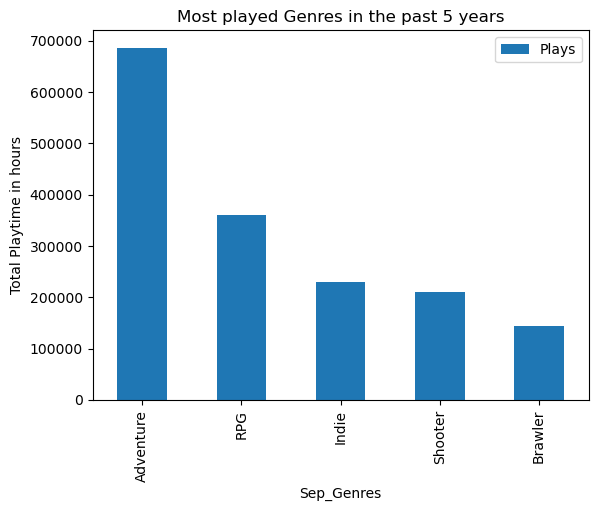

In [25]:
df1.query('Year>2018').groupby(['Sep_Genres'])['Plays'].sum().reset_index()\
    .sort_values(by='Plays', ascending=False)\
        .head(5)\
          .plot(x='Sep_Genres', y='Plays', kind='bar', title='Most played Genres in the past 5 years',xlabel='Sep_Genres',ylabel='Total Playtime in hours')
plt.show() 

Games count grouped by rating interval, only counting for games who have received at least 100 reviews

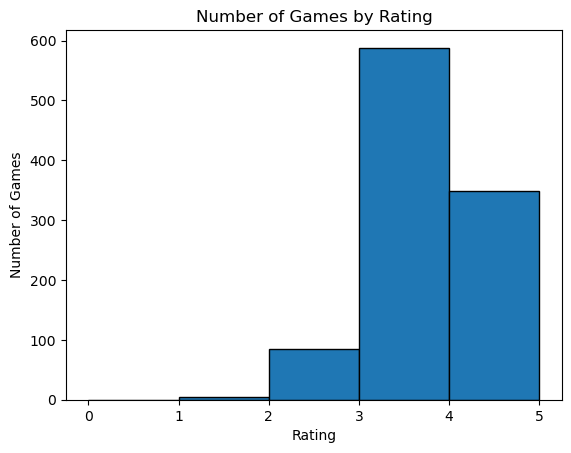

In [26]:
bins=np.linspace(0,5,6)
names=['under 1','1-1.9','2-2.9','3-3.9','4+']
binned=pd.cut(df['Rating'],bins, labels=names, include_lowest=True)
plt.hist(df[df['Number of Reviews']>=100]['Rating'], bins=bins, edgecolor='black')
plt.title('Number of Games by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Games')
plt.show()

Taking a look at the rating distribution for some of the genres that received a decent amount of reviews

In [27]:
genre_rating = df1[(df1['Number of Reviews']>=250) & (df1['Year']>2018)].groupby('Sep_Genres')['Rating'].agg(['count','max','min','mean'])\
    .sort_values(by='mean', ascending=False).head(12)\
    .reset_index()
genre_rating

Rating distribution Per Genre including only games that received at least 250 reviews

In [29]:
c=['Adventure','RPG', 'Strategy', 'Brawler', 'Indie','Platform']
fig = px.box(df1[(df1['Number of Reviews']>=250) & (df1['Year']>2018) & (df1['Sep_Genres'].isin(c))], x='Sep_Genres' ,y="Rating", labels={'Sep_Genres':'Genre'})
fig.show()

Ratings Distributions for games released in the past 5 years

In [39]:
fig = px.box(df[['Rating','Year','Number of Reviews']][(df['Year']>=2019)&(df['Number of Reviews']>=250)], x='Year' ,y="Rating", labels={'Year':'Genre'})
fig.show()

Genres earning 4* or higher ratings, including only the games receiving 250+ reviews

In [42]:
ax =df1[(df1['Rating']>=4) & (df1['Number of Reviews']>=250) & (df1['Year']>=2021)].groupby('Sep_Genres').count()['Title']\
    .sort_values(ascending=False).reset_index()
px.pie(ax, values='Title', names='Sep_Genres',labels={'Sep_Genres':'Genre'} ,title='Videogames Genres Receiving 4*+ Ratings and their frequency in the past 3 years')